In [1]:
# Settings for notebook visualization
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
%matplotlib inline
from IPython.core.display import HTML
HTML("""<style>.output_png img {display: block;margin-left: auto;margin-right: auto;} </style>""")

In [2]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import quantstats as qs
import statistics as st
from datetime import datetime, timedelta
from matplotlib.colors import DivergingNorm
from scipy.signal import convolve2d
import import_ipynb
import Functions

importing Jupyter notebook from Functions.ipynb


In [3]:
# Settings for plot visualization
qs.extend_pandas()
# plt.rcParams['figure.figsize'] = (20,6) # (26,12)
plt.rcParams['text.color'] = 'k'
plt.rcParams['legend.facecolor'] = 'w'
plt.rcParams['xtick.color'] = 'k'
plt.rcParams['ytick.color'] = 'k'
plt.rcParams['axes.labelcolor'] = 'k'

plt.rcParams['figure.figsize'] = (26,12)
# plt.rcParams['text.color'] = 'w'
# plt.rcParams['legend.facecolor'] = '#2f3540'
# plt.rcParams['xtick.color'] = 'w'
# plt.rcParams['ytick.color'] = 'w'
# plt.rcParams['axes.labelcolor'] = 'w'


SMALL_SIZE = 13
MEDIUM_SIZE = 15
BIG_SIZE = 17
plt.rcParams['font.size'] = SMALL_SIZE
plt.rcParams['axes.titlesize'] = BIG_SIZE
plt.rcParams['axes.labelsize'] = MEDIUM_SIZE
plt.rcParams['xtick.labelsize'] = MEDIUM_SIZE
plt.rcParams['ytick.labelsize'] = MEDIUM_SIZE
plt.rcParams['legend.fontsize'] = SMALL_SIZE
plt.rcParams['figure.titlesize'] = BIG_SIZE

np.set_printoptions(edgeitems=40, linewidth=1000)

pd.set_option("display.precision", 6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
%run Functions.ipynb

In [5]:
ini_equity = 100
commision = 0.000111538462 # 0.001 = 0.1% of the daily return

## Download data from SP500

In [6]:
#data = get_sp500_data(from_local_file=False, save_to_file=True)
data = get_sp500_data(from_local_file=True, save_to_file=False)
data.shape
from_date = '1970-01-01'

data = data.loc[from_date:, ['Open', 'Close']].copy()
data['Market_daily_ret'] = data['Close'].pct_change().fillna((data['Close']-data['Open'])/data['Open'])
data = data.drop(['Open'], axis=1)

(12699, 5)

In [7]:
data.head()

Close  Market_daily_ret
Date                                   
1970-01-02  93.000000          0.010211
1970-01-05  93.459999          0.004946
1970-01-06  92.820000         -0.006848
1970-01-07  92.629997         -0.002047
1970-01-08  92.680000          0.000540

In [8]:
data.tail()

Close  Market_daily_ret
Date                                     
2020-04-29  2939.510010          0.026584
2020-04-30  2912.429932         -0.009212
2020-05-01  2830.709961         -0.028059
2020-05-04  2842.739990          0.004250
2020-05-05  2868.439941          0.009041

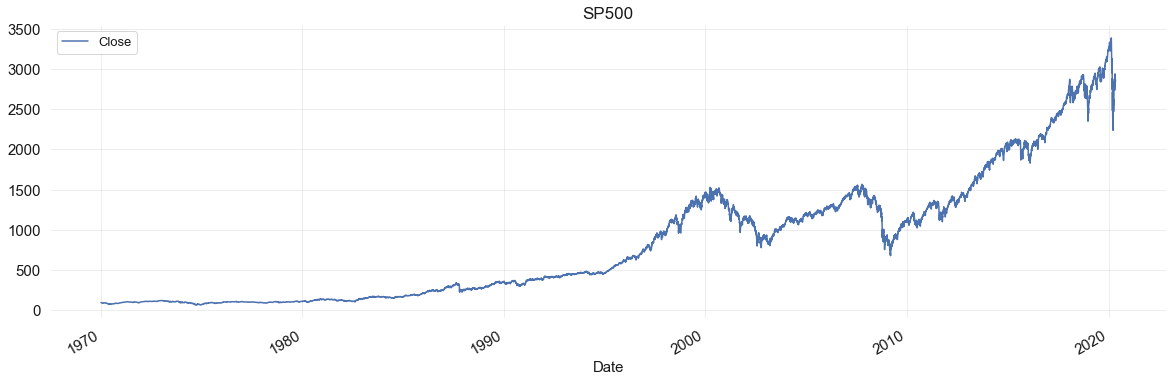

In [9]:
data['Close'].plot(legend=True, title="SP500")

In [10]:
#data.loc['2020', 'Close'].plot(legend=True, title="SP500 in 2020")

## Walk-Forward Optimization

### Define values of Moving Averages and time periods for optimization

In [11]:
%run Functions.ipynb

In [12]:
# fast_ma_list = [1, 3, 5, 10, 15, 20, 25]
# slow_ma_list = [5, 10, 20, 40, 60, 80, 100]

fast_ma_list = [1, 3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]
slow_ma_list = [5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260]

IS_start_years = pd.date_range(start='1970-01-01', end='2017-01-01', freq='1YS', closed=None)
IS_end_years = pd.date_range(start='1972-12-31', end='2019-12-31', freq='1Y', closed=None)
OOS_start_years = pd.date_range(start='1973-01-01', end='2020-01-01', freq='1YS', closed=None)
OOS_end_years = pd.date_range(start='1973-12-31', end='2020-12-31', freq='1Y', closed=None)

# IS_start_years = pd.date_range(start='2010-01-01', end='2017-01-01', freq='1YS', closed=None)
# IS_end_years = pd.date_range(start='2012-12-31', end='2019-12-31', freq='1Y', closed=None)
# OOS_start_years = pd.date_range(start='2013-01-01', end='2020-01-01', freq='1YS', closed=None)
# OOS_end_years = pd.date_range(start='2013-12-31', end='2020-12-31', freq='1Y', closed=None)

num_neighbors_matrix = get_num_neighbors(fast_ma_list, slow_ma_list)

len(IS_start_years)
print_periods(IS_start_years, IS_end_years, OOS_start_years, OOS_end_years)

48

	In SAMPLE		OOS
1970-01-01 1972-12-31 	 1973-01-01 1973-12-31
1971-01-01 1973-12-31 	 1974-01-01 1974-12-31
1972-01-01 1974-12-31 	 1975-01-01 1975-12-31
1973-01-01 1975-12-31 	 1976-01-01 1976-12-31
1974-01-01 1976-12-31 	 1977-01-01 1977-12-31
1975-01-01 1977-12-31 	 1978-01-01 1978-12-31
1976-01-01 1978-12-31 	 1979-01-01 1979-12-31
1977-01-01 1979-12-31 	 1980-01-01 1980-12-31
1978-01-01 1980-12-31 	 1981-01-01 1981-12-31
1979-01-01 1981-12-31 	 1982-01-01 1982-12-31
1980-01-01 1982-12-31 	 1983-01-01 1983-12-31
1981-01-01 1983-12-31 	 1984-01-01 1984-12-31
1982-01-01 1984-12-31 	 1985-01-01 1985-12-31
1983-01-01 1985-12-31 	 1986-01-01 1986-12-31
1984-01-01 1986-12-31 	 1987-01-01 1987-12-31
1985-01-01 1987-12-31 	 1988-01-01 1988-12-31
1986-01-01 1988-12-31 	 1989-01-01 1989-12-31
1987-01-01 1989-12-31 	 1990-01-01 1990-12-31
1988-01-01 1990-12-31 	 1991-01-01 1991-12-31
1989-01-01 1991-12-31 	 1992-01-01 1992-12-31
1990-01-01 1992-12-31 	 1993-01-01 1993-12-31
1991-01-01 1993-12

### Optimization

In [13]:
%run Functions.ipynb

Best In-sample performance:
	Period: 1970-01-02 to 1972-12-29
	Overall return of SP500: 128.23 %. SR of SP500: 0.78
	Overall return of 1-5 MA crossover: 261.17 %. Sharpe ratio strategy: 2.87
OOS performance:
	Period: 1973-01-02 to 1973-12-31
	Overall return of SP500: 82.63 %. SR of SP500: -1.13
	Overall return of 1-5 MA crossover: 133.71 %. Sharpe ratio strategy: 1.92

Best In-sample performance:
	Period: 1971-01-04 to 1973-12-31
	Overall return of SP500: 105.86 %. SR of SP500: 0.22
	Overall return of 1-5 MA crossover: 236.80 %. Sharpe ratio strategy: 2.52
OOS performance:
	Period: 1974-01-02 to 1974-12-31
	Overall return of SP500: 70.28 %. SR of SP500: -1.50
	Overall return of 1-5 MA crossover: 153.13 %. Sharpe ratio strategy: 2.06

Best In-sample performance:
	Period: 1972-01-03 to 1974-12-31
	Overall return of SP500: 67.16 %. SR of SP500: -0.73
	Overall return of 1-5 MA crossover: 263.89 %. Sharpe ratio strategy: 2.08
OOS performance:
	Period: 1975-01-02 to 1975-12-31
	Overall retur

/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


Best In-sample performance:
	Period: 1990-01-02 to 1992-12-31
	Overall return of SP500: 123.29 %. SR of SP500: 0.58
	Overall return of long only: 123.29 %. Sharpe ratio strategy: 0.58
OOS performance:
	Period: 1993-01-04 to 1993-12-31
	Overall return of SP500: 107.06 %. SR of SP500: 0.83
	Overall return of long only: 107.06 %. Sharpe ratio strategy: 0.83

Best In-sample performance:
	Period: 1991-01-02 to 1993-12-31
	Overall return of SP500: 141.25 %. SR of SP500: 1.08
	Overall return of long only: 141.25 %. Sharpe ratio strategy: 1.08
OOS performance:
	Period: 1994-01-03 to 1994-12-30
	Overall return of SP500: 98.46 %. SR of SP500: -0.11
	Overall return of long only: 98.46 %. Sharpe ratio strategy: -0.11

Best In-sample performance:
	Period: 1992-01-02 to 1994-12-30
	Overall return of SP500: 110.11 %. SR of SP500: 0.39
	Overall return of long only: 110.11 %. Sharpe ratio strategy: 0.39
OOS performance:
	Period: 1995-01-03 to 1995-12-29
	Overall return of SP500: 134.11 %. SR of SP500: 

Best In-sample performance:
	Period: 2013-01-02 to 2015-12-31
	Overall return of SP500: 143.31 %. SR of SP500: 1.00
	Overall return of long only: 143.31 %. Sharpe ratio strategy: 1.00
OOS performance:
	Period: 2016-01-04 to 2016-12-30
	Overall return of SP500: 109.54 %. SR of SP500: 0.76
	Overall return of long only: 109.54 %. Sharpe ratio strategy: 0.76

Best In-sample performance:
	Period: 2014-01-02 to 2016-12-30
	Overall return of SP500: 121.13 %. SR of SP500: 0.54
	Overall return of long only: 121.13 %. Sharpe ratio strategy: 0.54
OOS performance:
	Period: 2017-01-03 to 2017-12-29
	Overall return of SP500: 119.42 %. SR of SP500: 2.70
	Overall return of long only: 119.42 %. Sharpe ratio strategy: 2.70

Best In-sample performance:
	Period: 2015-01-02 to 2017-12-29
	Overall return of SP500: 129.86 %. SR of SP500: 0.77
	Overall return of long only: 129.86 %. Sharpe ratio strategy: 0.77
OOS performance:
	Period: 2018-01-02 to 2018-12-31
	Overall return of SP500: 93.76 %. SR of SP500: -

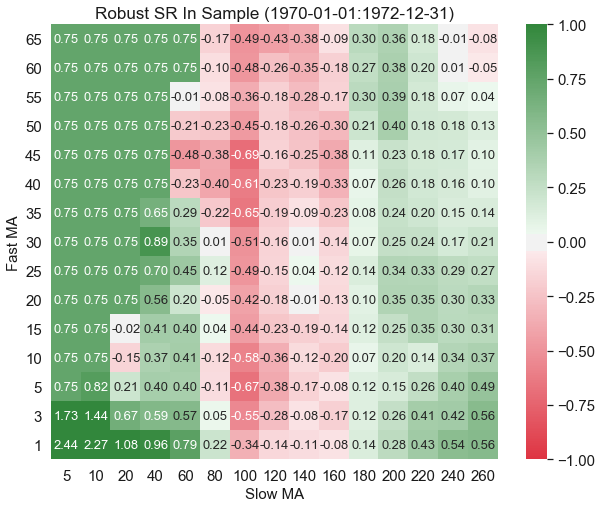

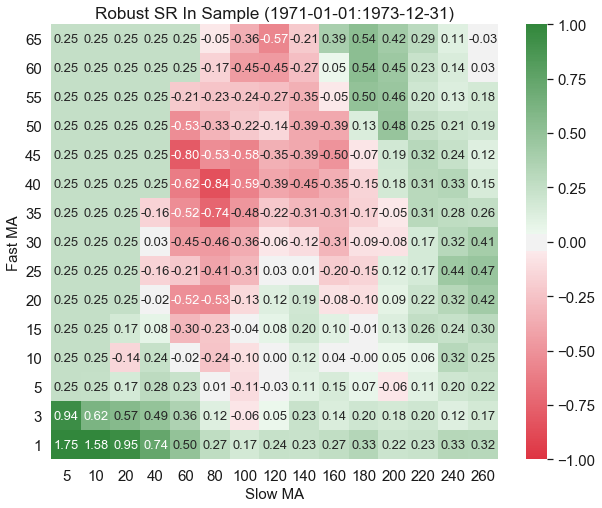

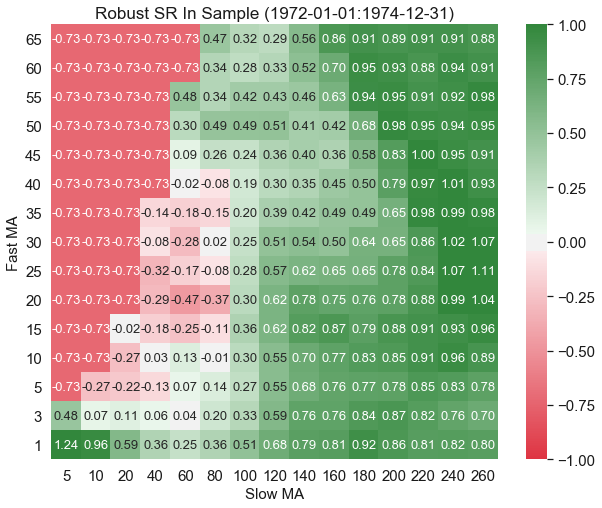

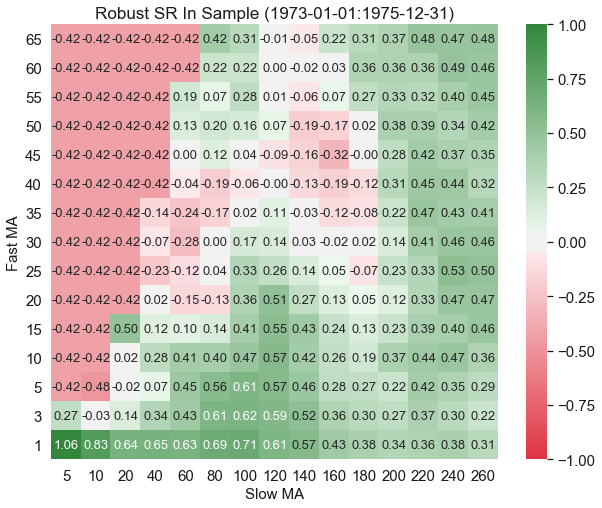

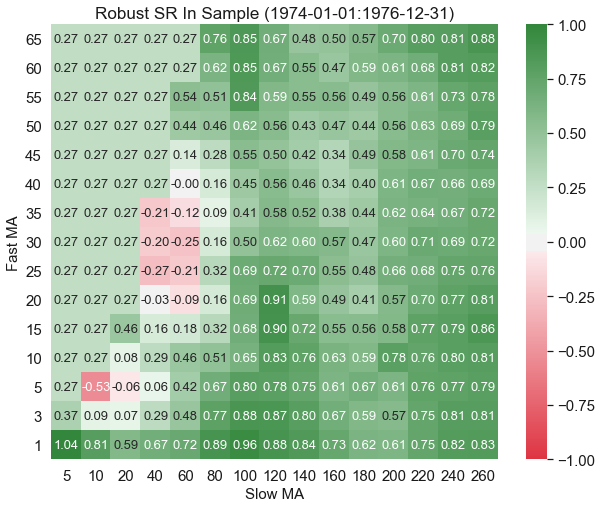

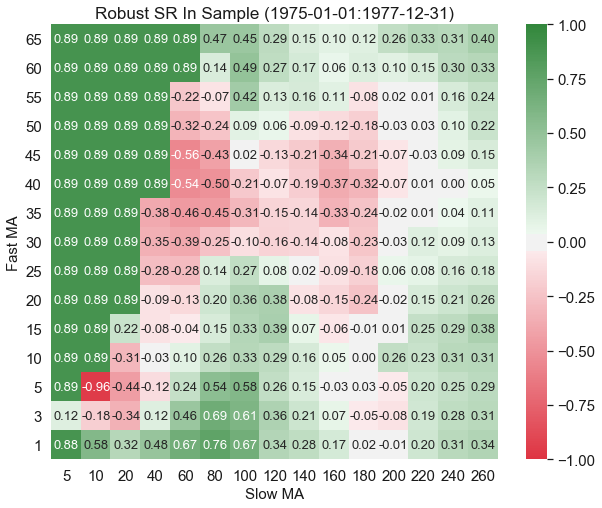

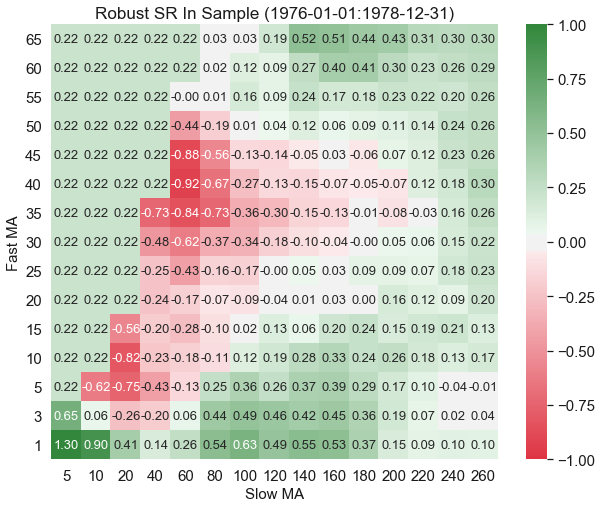

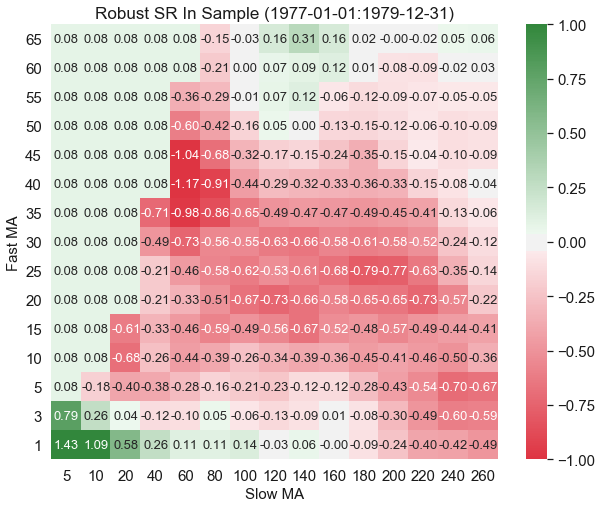

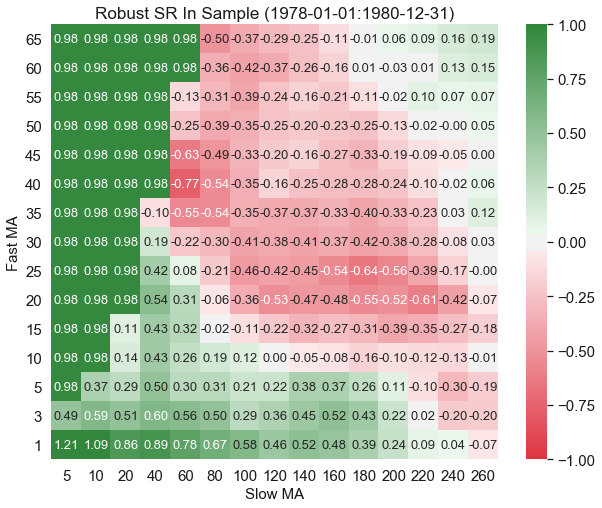

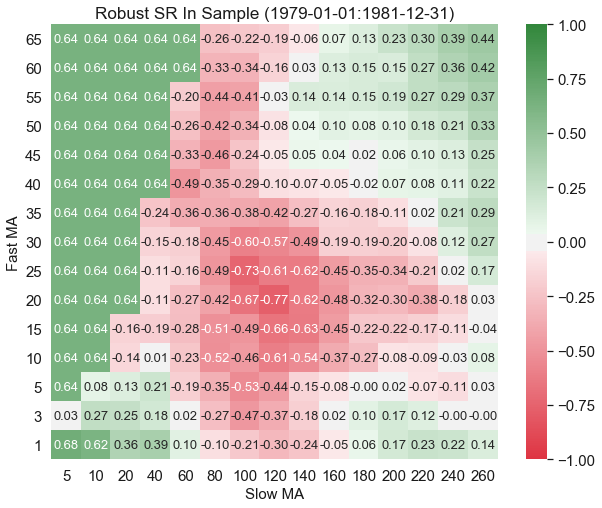

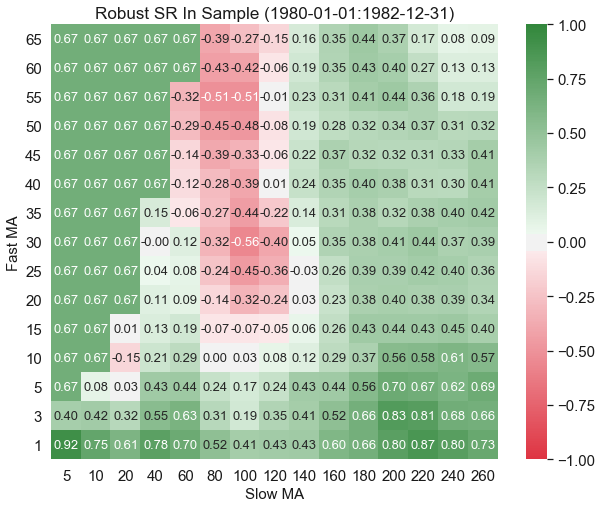

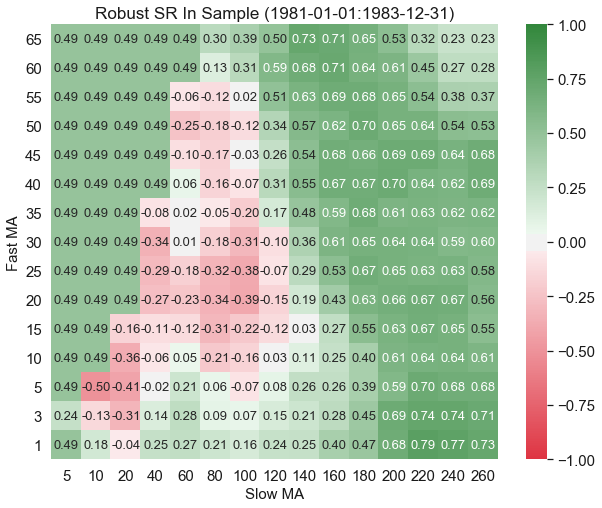

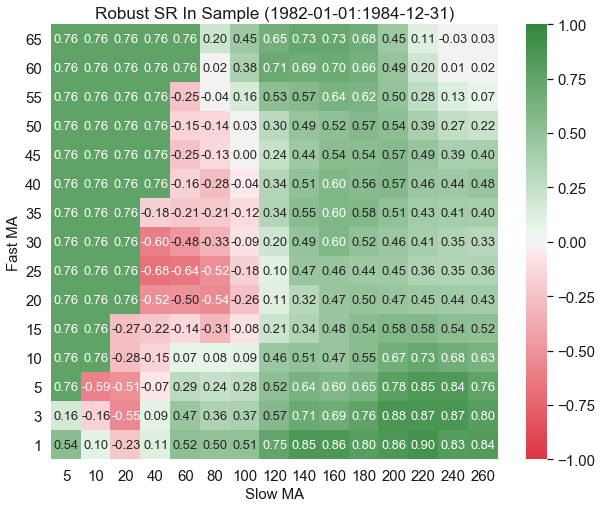

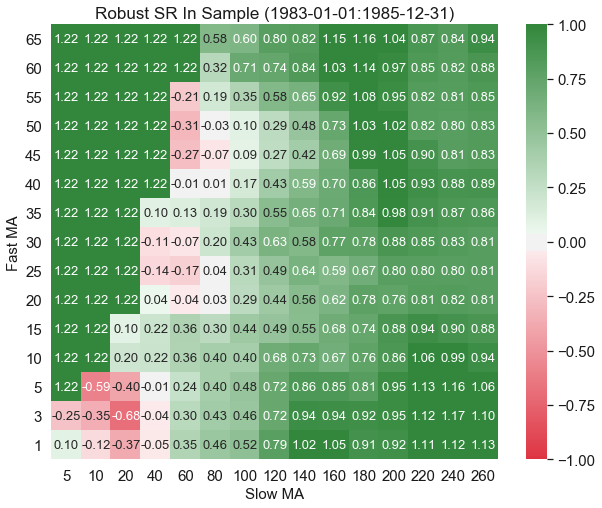

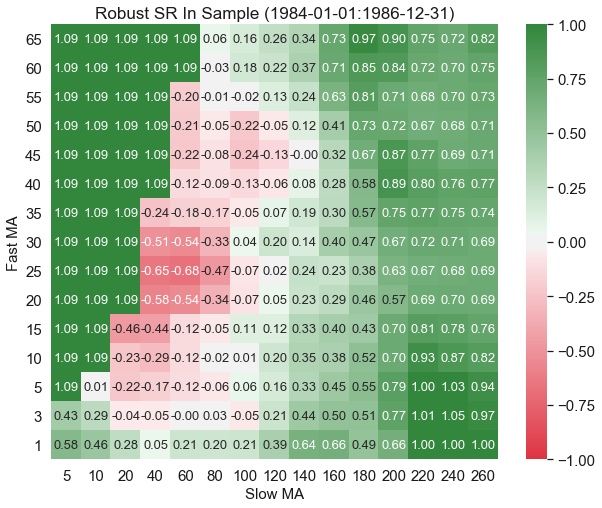

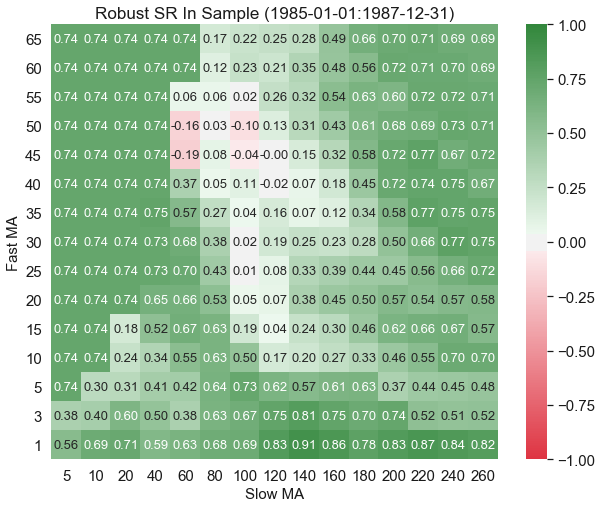

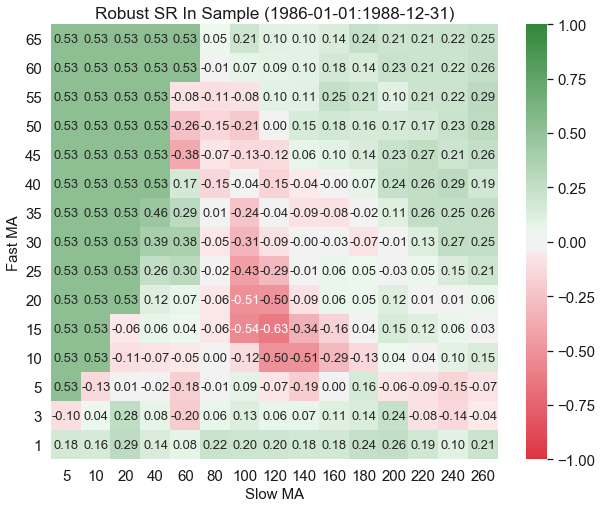

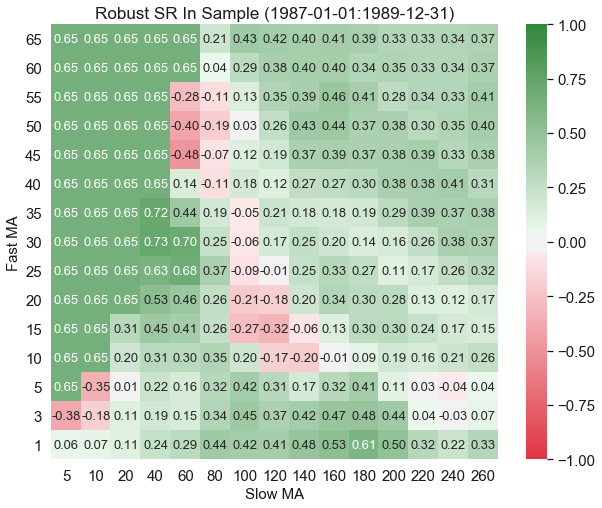

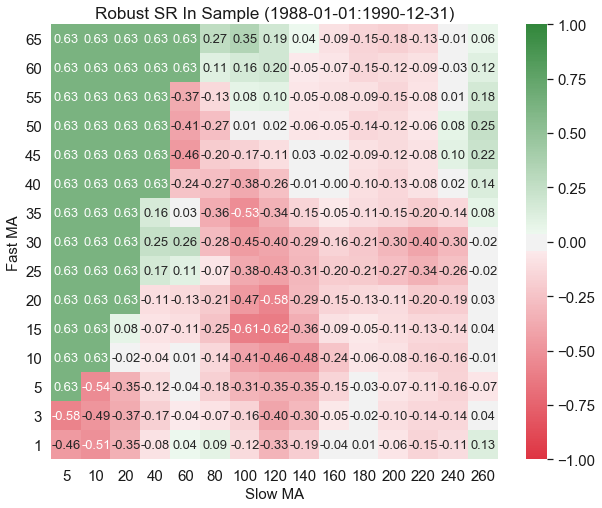

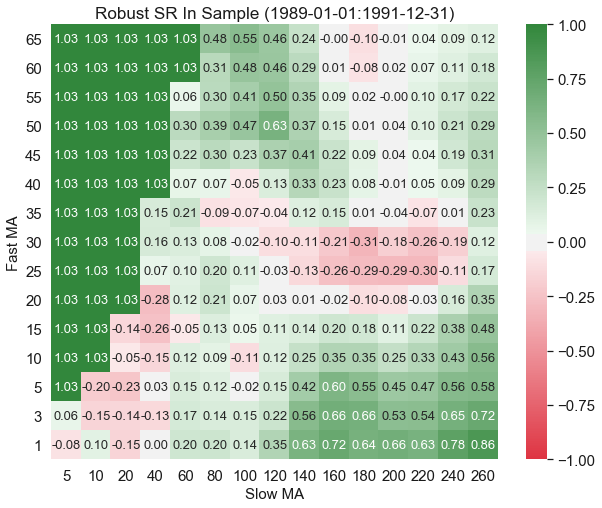

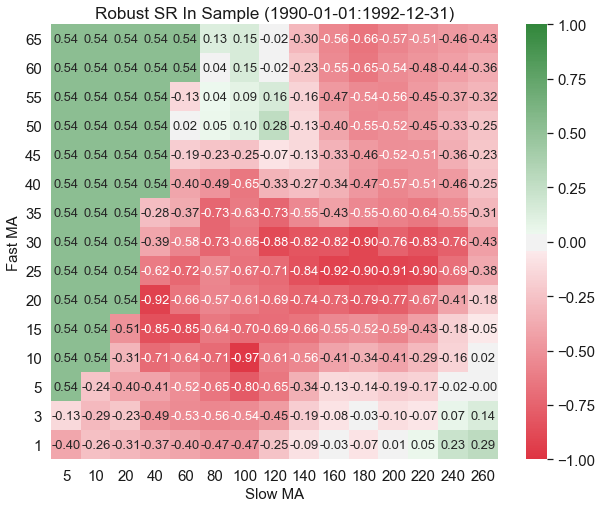

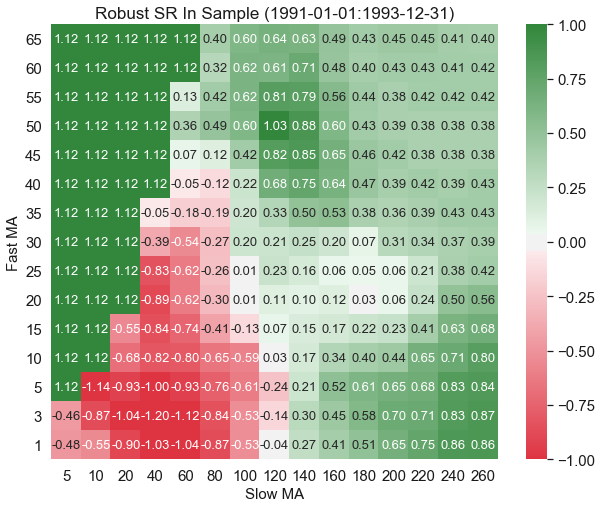

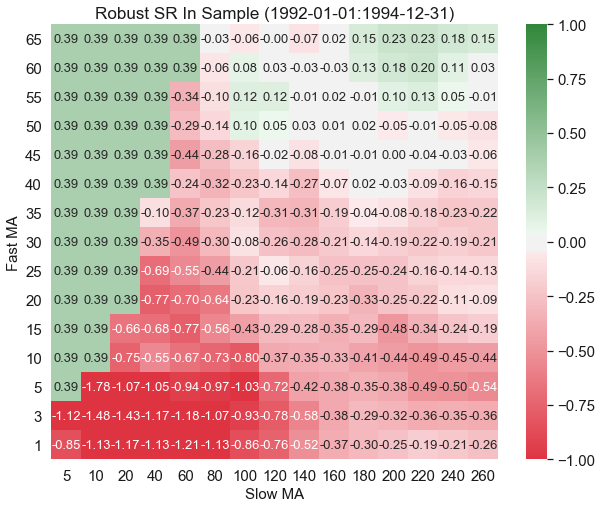

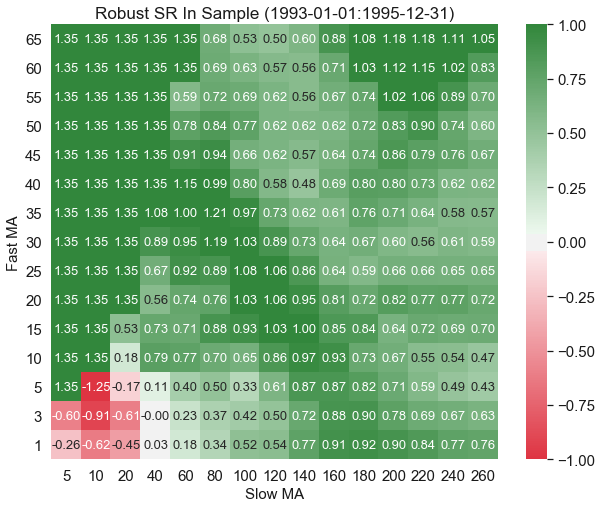

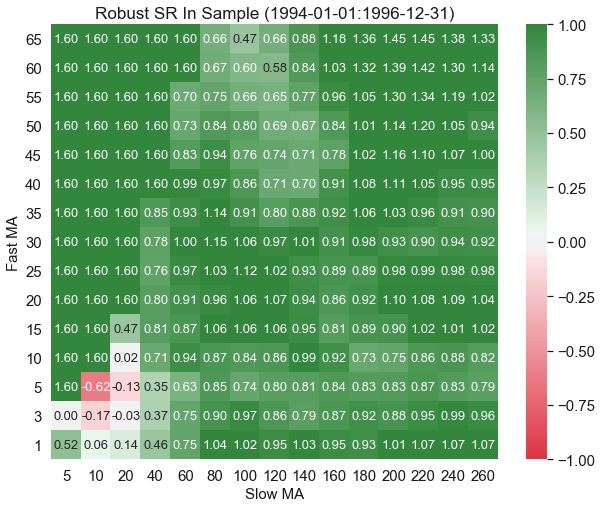

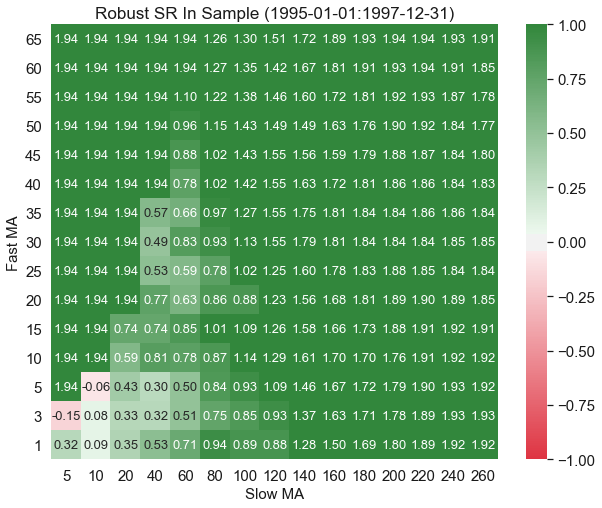

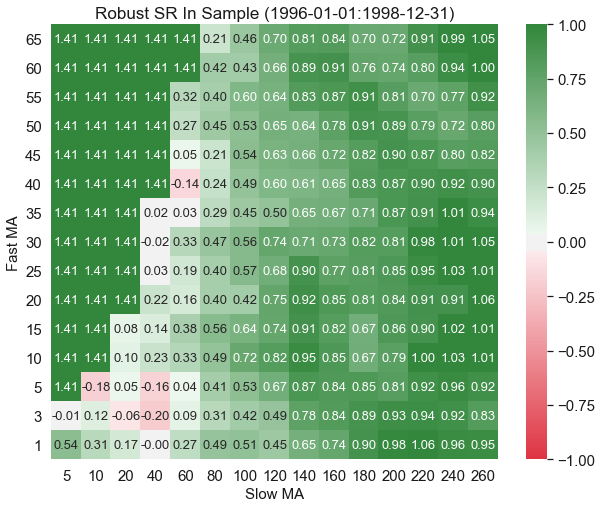

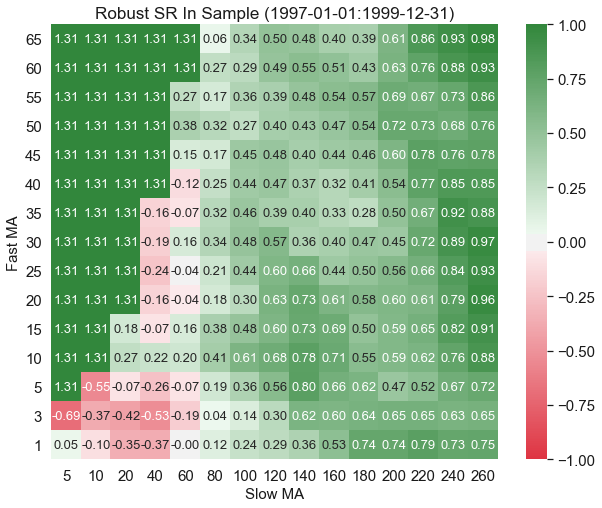

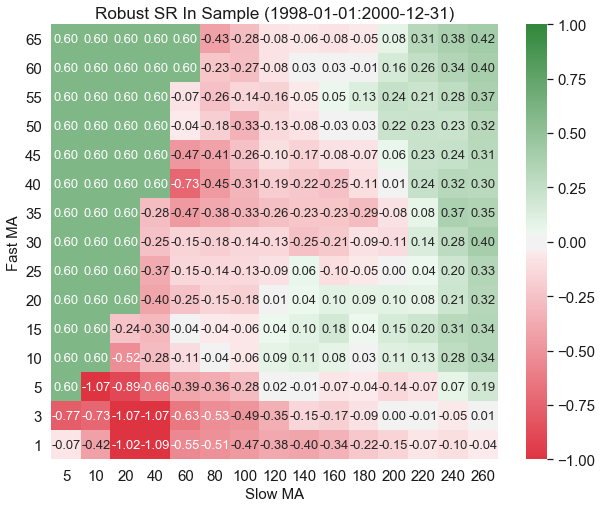

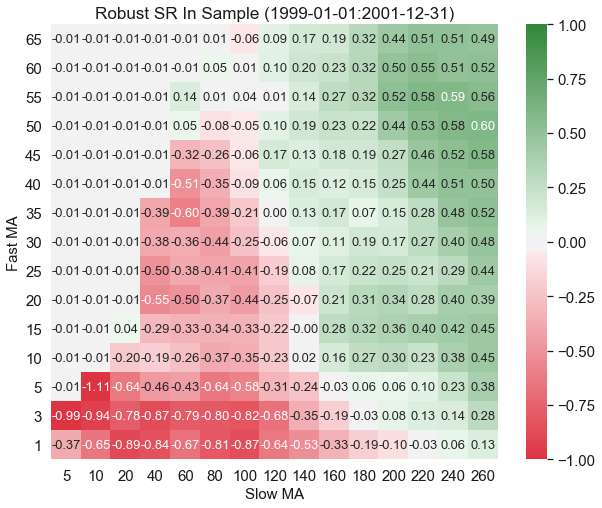

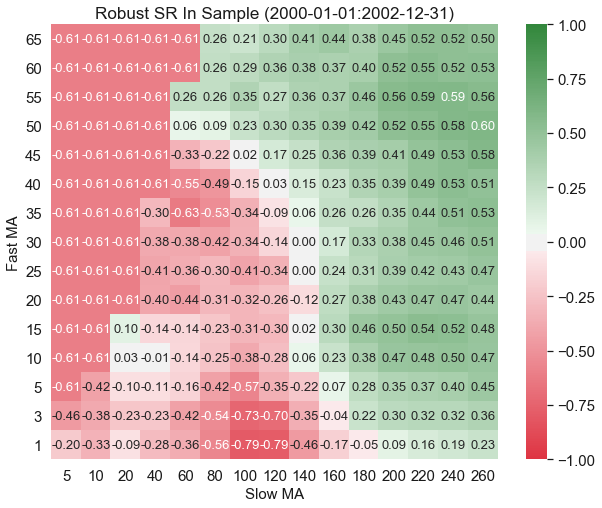

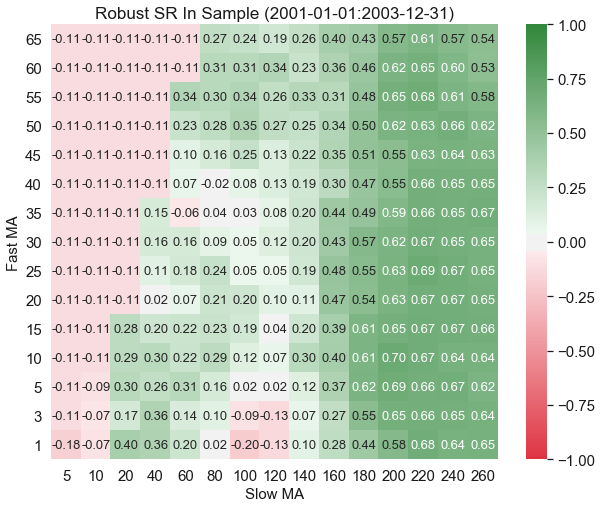

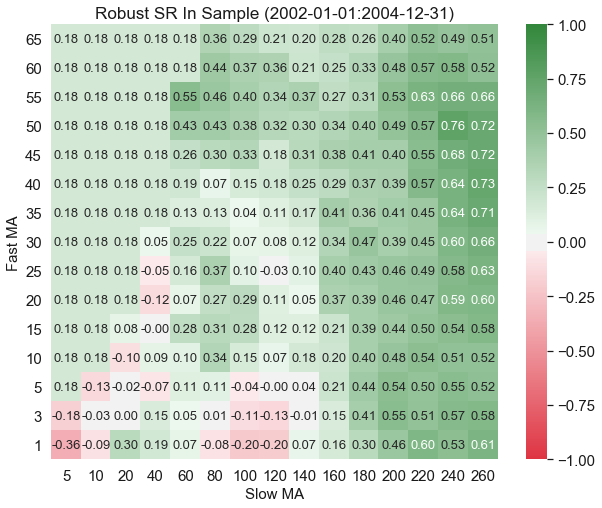

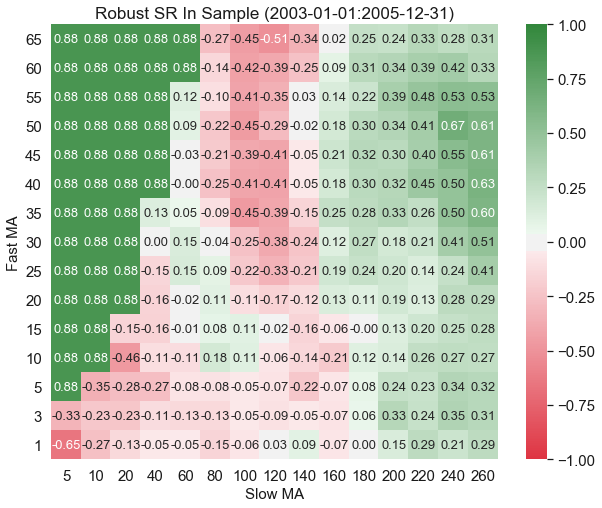

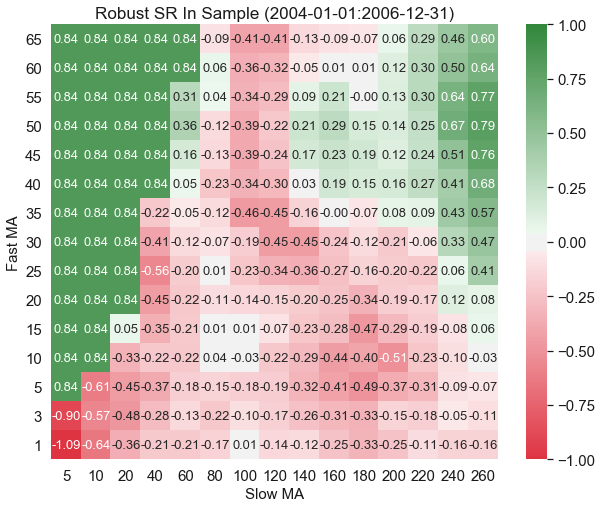

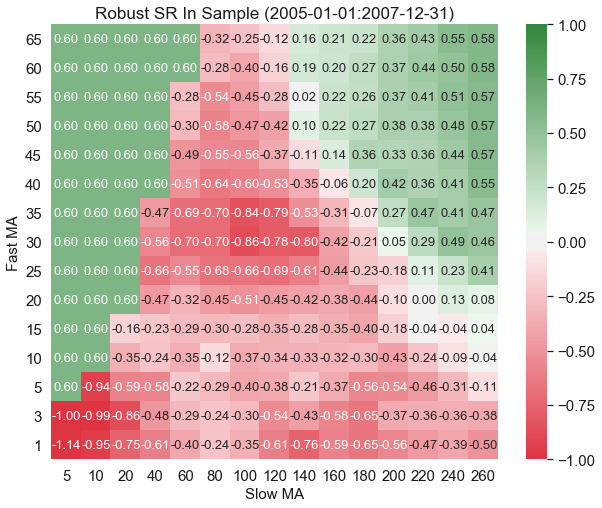

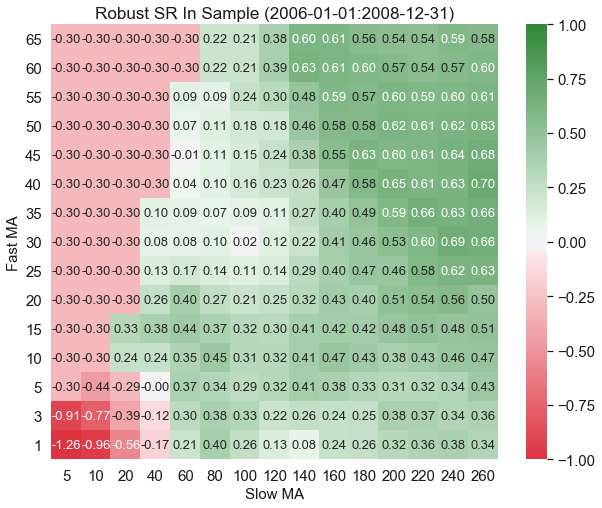

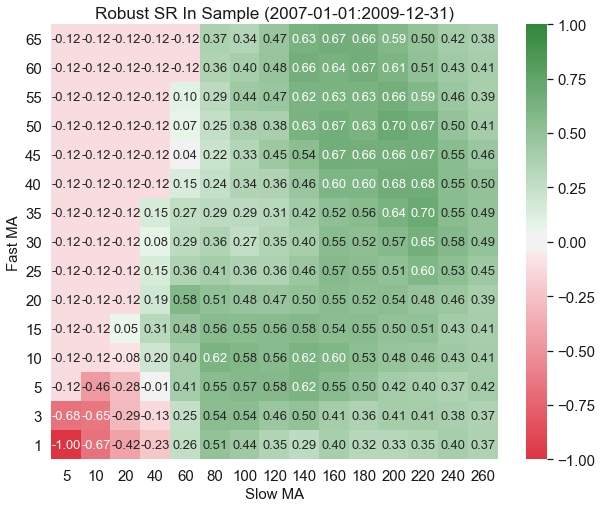

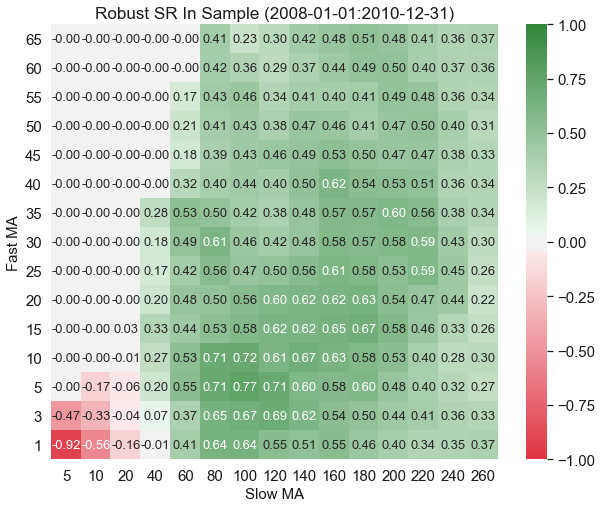

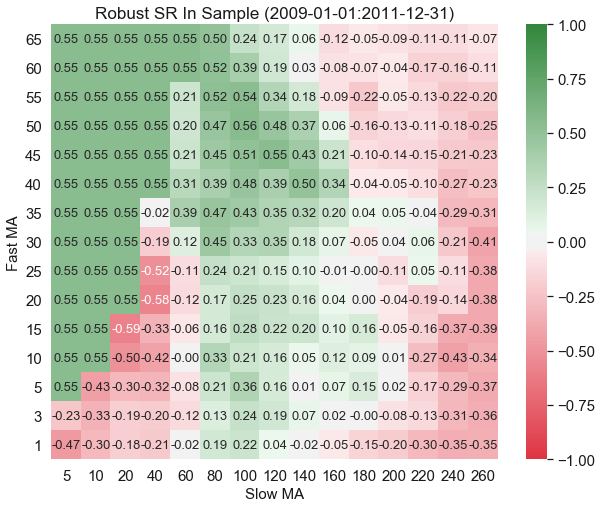

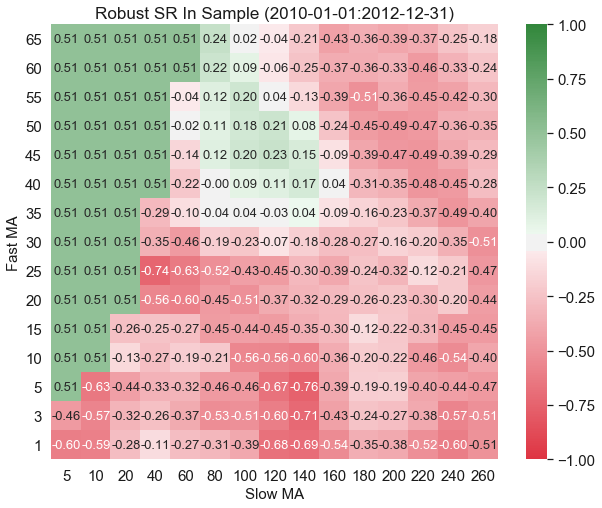

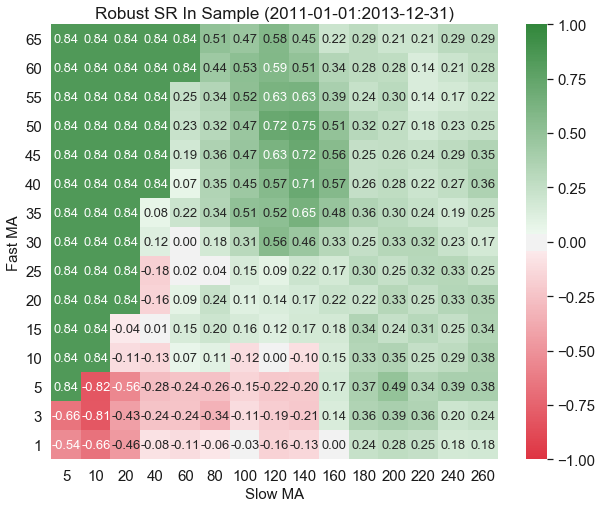

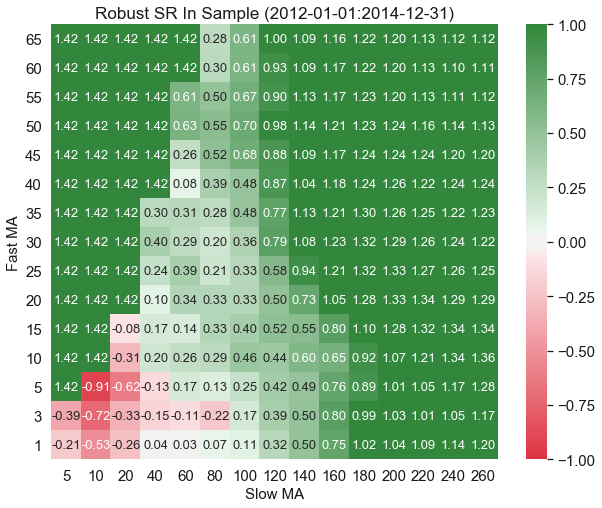

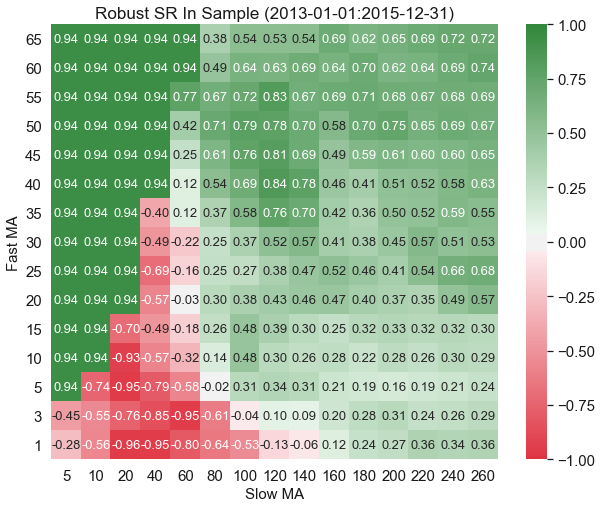

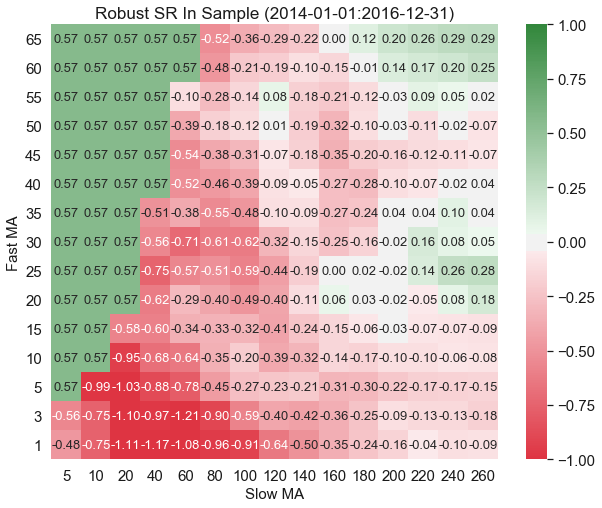

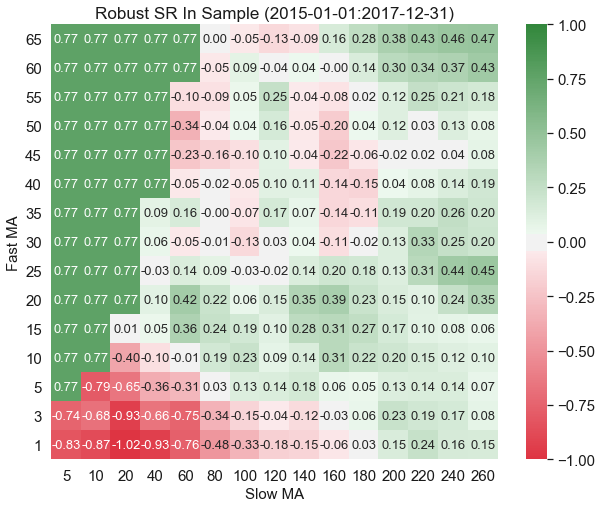

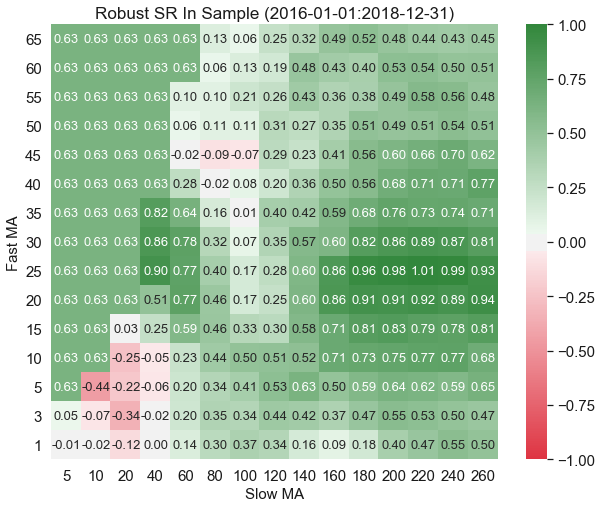

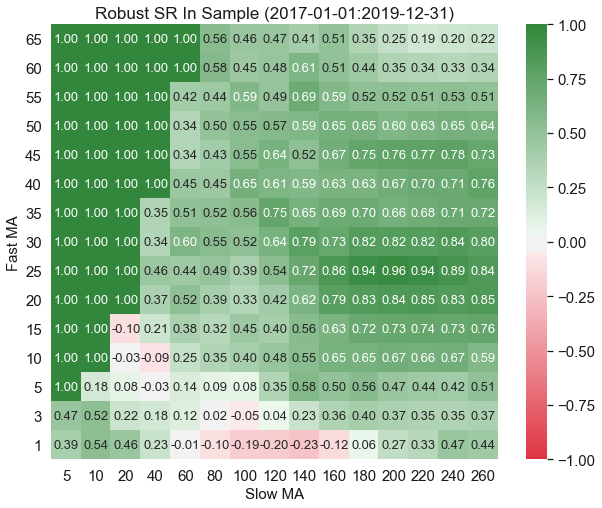

In [14]:
%run Functions.ipynb
df = data[IS_start_years[0]:OOS_end_years[-1]].copy()

last_position = 0 # We suppose that we start not being invested. 1:long, -1:short

market_pln = []
oos_pln = []
market_sr = []
oos_sr = []
market_max_dd = []
oos_max_dd = []
best_combinations = []

# Create necessary columns 
cols = ['Strat_daily_ret', 'Strat_position', 'Long_only', 'Costs', 'Market_cum_ret']
df = pd.concat([df, pd.DataFrame(columns=cols)])

for IS_start, IS_end, OOS_start, OOS_end in zip(IS_start_years, IS_end_years, OOS_start_years, OOS_end_years):
    results_pnl = np.zeros((len(fast_ma_list),len(slow_ma_list)))
    results_sharpe = np.zeros((len(fast_ma_list),len(slow_ma_list)))

    in_sample = df.loc[IS_start:IS_end].copy()
    oos_sample = df.loc[OOS_start:OOS_end].copy()
    
    ############################################ IN SAMPLE  ############################################
    results_pnl, results_sharpe, market_sharpe = run_all_combinations(in_sample, fast_ma_list, slow_ma_list)
    title = "Individual SR In Sample ("+str(IS_start.date())+":"+ str(IS_end.date()) +")"
    #show_heatmap(results_sharpe, market_sharpe, plot_title=title, x_title="Slow MA", x_values=slow_ma_list, y_title="Fast MA", y_values=fast_ma_list)
    
    # Get index of maximum SR for the In-Sample period
    fast_index, slow_index, robust_results_sharpe = get_best_combination(market_sharpe, results_sharpe, num_neighbors_matrix, allow_long_only=True)
    title = "Robust SR In Sample ("+str(IS_start.date())+":"+ str(IS_end.date()) +")"
    show_heatmap(robust_results_sharpe, market_sharpe, plot_title=title, x_title="Slow MA", x_values=slow_ma_list, y_title="Fast MA", y_values=fast_ma_list)

    print("Best In-sample performance:")
    print_backtest_stats(in_sample, fast_ma_list[fast_index], slow_ma_list[slow_index], ret_strat=results_pnl[fast_index, slow_index], sr_strat=results_sharpe[fast_index, slow_index])
    
    ############################################ OUT OF SAMPLE  ############################################
    print("OOS performance:")
    _, pnl_sp, sharpe_sp = backtest_ma_strat(oos_sample, fast_ma=1, slow_ma=1, last_position=1) # Market- always long
    _, pnl, sharpe = backtest_ma_strat(oos_sample, fast_ma_list[fast_index], slow_ma_list[slow_index], last_position=last_position)
    print_backtest_stats(oos_sample, fast_ma_list[fast_index], slow_ma_list[slow_index], pnl, sharpe)  

    ############################################ Save metrics  ############################################
    best_combinations.append([fast_ma_list[fast_index], slow_ma_list[slow_index]])
    market_max_dd.append(oos_sample['Market_daily_ret'].max_drawdown())
    oos_max_dd.append(oos_sample['Strat_daily_ret'].max_drawdown())
    market_pln.append(pnl_sp)
    market_sr.append(sharpe_sp)
    oos_pln.append(pnl)
    oos_sr.append(sharpe)
    
    # Save come columns from OOS
    df.loc[OOS_start:OOS_end, cols] = oos_sample[cols]
    print()


print("End of optimization")

1    25
0    23
Name: Long_only, dtype: int64

5     26
1     13
50     5
40     1
30     1
25     1
10     1
Name: Fast_ma, dtype: int64

5      35
220     3
260     3
100     2
200     2
240     1
40      1
140     1
Name: Slow_ma, dtype: int64

1973  1974  1975  1976  1977  1978  1979  1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  2020
Fast_ma       1     1     1     1     1     5     1     1     1     1     1     1     1     5     5     1     5    30     5     5     5     5     5     5     5     5     5     5     5    50    50    10    50     5     5     5    40    50     5    50     5     5     5     5     5     5    25     5
Slow_ma       5     5     5     5     5     5     5     5     5     5     5   220   220     5     5   140     5    40     5     5     5     5     5     5     5     5     5     5     5   260   260   200   240     5     5     5   260   200   100   100     5     5     5     5     5     5   220     5
Long_only     0     0     0     0     0     1     0     0     0     0     0     0     0     1     1     0     1     0     1     1     1     1     1     1     1     1     1     1     1     0     0     0     0     1     1     1     0     0     0     0     1     1     1     1     1     1     0     1

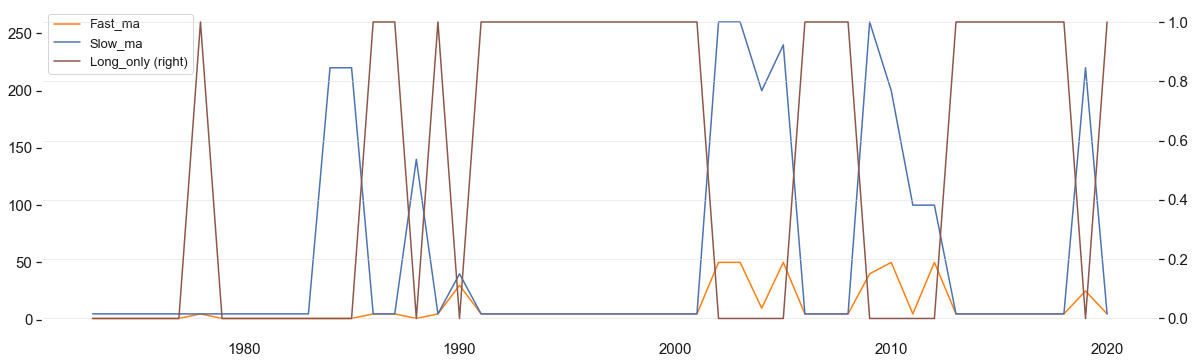

In [15]:
bests = pd.DataFrame(best_combinations, columns=['Fast_ma', 'Slow_ma'], index=OOS_start_years.year)
bests['Long_only'] = np.where(bests['Fast_ma'] == bests['Slow_ma'], 1, 0)
bests['Long_only'].value_counts()
bests['Fast_ma'].value_counts()
bests['Slow_ma'].value_counts()
bests.T
bests.plot(secondary_y=['Long_only'], color=('tab:orange', 'b', 'tab:brown'))

### Plot OOS of Strategy vs Benchmark

Close  Market_daily_ret  Strat_daily_ret Strat_position Long_only        Costs  Market_cum_ret  Strat_cum_ret
1973-01-02   119.099998          0.008894        -0.000112              1         0  0.000111538      100.889450      99.988846
2020-05-05  2868.439941          0.009041         0.009041              1         1            0     2429.851645    3794.274307

1    6136
0    5805
Name: Long_only, dtype: int64

 1    9510
-1    2431
Name: Strat_position, dtype: int64

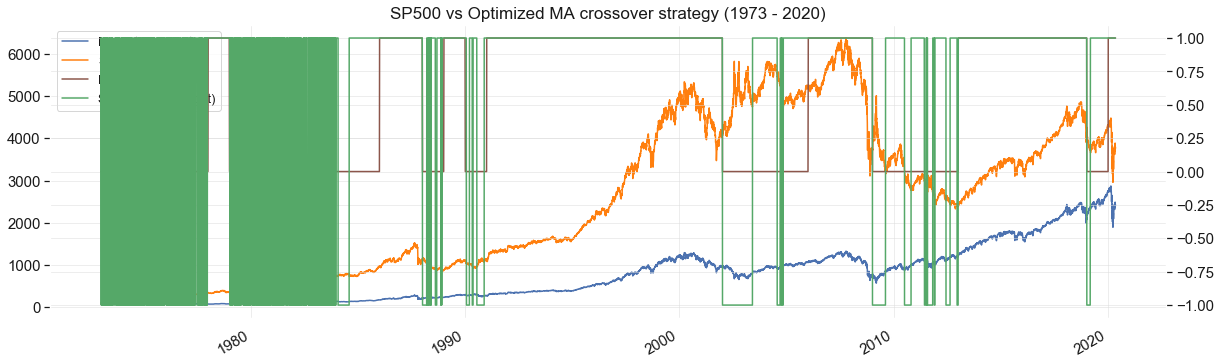

In [16]:
results_df = prepare_oos_df(df.loc[OOS_start_years[0]:OOS_end_years[-1]].copy())
results_df.iloc[[0,-1]]
results_df['Long_only'].value_counts()
results_df['Strat_position'].value_counts()
show_oos_plot(results_df)

### Save metrics from the optimization

In [17]:
metrics = ['PNL', 'SR', 'MAX_DD']
index = pd.MultiIndex.from_product([['SP500', 'Strategy']], names=['Asset'])
columns = pd.MultiIndex.from_product([[], metrics], names=['Year', 'Metric'])

metrics_df = pd.DataFrame([], index=index, columns=columns)

for i, year in enumerate(OOS_start_years.year):
    year_sp_pln = market_pln[i]
    year_oos_pln = oos_pln[i]
    year_sp_sr = market_sr[i]
    year_oos_sr = oos_sr[i]
    year_sp_dd = market_max_dd[i]
    year_oos_dd = oos_max_dd[i]
    
    year_data = [[year_sp_pln, year_sp_sr, year_sp_dd], [year_oos_pln, year_oos_sr, year_oos_dd]]
    
    metrics_df = add_data(metrics_df, year_data, year)

metrics_df

Year            1973                            1974                            1975                            1976                            1977                           1978                            1979                           1980                            1981                            1982                            1983                            1984                            1985                            1986                            1987                            1988                            1989                           1990                            1991                            1992                            1993                           1994                            1995                            1996                            1997                            1998                           1999                           2000                           2001                            2002                            2003                      \
Metric           PNL        SR    MAX_DD         PNL        SR    MAX_DD         PNL        SR    MAX_DD         PNL        SR    MAX_DD         PNL       SR    MAX_DD         PNL        SR    MAX_DD         PNL        SR    MAX_DD        PNL        SR    MAX_DD         PNL        SR    MAX_DD         PNL        SR    MAX_DD         PNL        SR    MAX_DD         PNL        SR    MAX_DD         PNL        SR    MAX_DD         PNL        SR    MAX_DD         PNL        SR    MAX_DD         PNL        SR    MAX_DD         PNL        SR   MAX_DD         PNL        SR    MAX_DD         PNL        SR    MAX_DD         PNL        SR    MAX_DD         PNL        SR    MAX_DD        PNL        SR    MAX_DD         PNL        SR    MAX_DD         PNL        SR    MAX_DD         PNL        SR    MAX_DD         PNL        SR   MAX_DD         PNL        SR    MAX_DD        PNL        SR    MAX_DD        PNL        SR    MAX_DD         PNL        SR    MAX_DD         PNL        SR    MAX_DD   
Asset                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
SP500      82.634477 -1.126119 -0.233533   70.281902 -1.500315 -0.375952  131.549016  1.847720 -0.141408  119.148460  1.627096 -0.083650   88.498045 -1.30078 -0.152243  101.062042  0.146459 -0.135527  112.308815  1.120375 -0.102453  125.77357  1.469919 -0.170719   90.269599 -0.690813 -0.183536  114.761319  0.841849 -0.165553  117.271042  1.257962 -0.069068  101.400602  0.171881 -0.126772  126.333408  2.351405 -0.076616  114.620409  0.998813 -0.094236  102.027503  0.232683 -0.335095  112.400841  0.767246 -0.076405  127.250465  1.911992 -0.07557   93.440862 -0.344089 -0.199187  126.306703  1.698666 -0.056038  104.464263  0.495754 -0.062433  107.055156  0.832436 -0.049942  98.460709 -0.108495 -0.089378  134.110655  3.800608 -0.025334  120.263666  1.613317 -0.076432  131.008182  1.575168 -0.107952  126.668589  1.267209 -0.19336  119.526047  1.077234 -0.120787  89.860815 -0.370296 -0.171998  86.957307 -0.551230 -0.296951   76.634036 -0.892748 -0.337524  126.380400  1.457266 -0.140534   
Strategy  13

Year            1973        1974        1975        1976        1977        1978        1979       1980        1981        1982        1983        1984        1985        1986        1987        1988        1989        1990        1991        1992        1993       1994        1995        1996        1997        1998        1999       2000       2001        2002        2003        2004        2005        2006        2007       2008        2009        2010       2011        2012        2013        2014       2015        2016        2017       2018        2019       2020
Asset                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
SP500      82.634477   70.281902  131.549016  119.148460   88.498045  101.062042  112.308815  125.77357   90.269599  114.761319  117.271042  101.400602  126.333408  114.620409  102.027503  112.400841  127.250465   93.440862  126.306703  104.464263  107.055156  98.460709  134.110655  120.263666  131.008182  126.668589  119.526047  89.860815  86.957307   76.634036  126.380400  108.993452  103.001023  113.619432  103.529573  61.514207  123.454190  112.782714  99.996816  113.405691  129.601250  111.390634  99.273400  109.535023  119.419966  93.762740  128.878070  88.784749
Strategy  133.710931  153.129782  123.266750  113.375392  123.367337  102.429419  118.552125  125.45602  107.074467  137.809530   92.523257  102.902712  127.747741  115.531748  100.244450   78.180188  128.350071  101.255597  127.751098  104.410052  107.124347  98.663364  134.142430  119.320380  131.656523  126.055639  119.622681  90.717060  89.455211  122.634844  110.074337   89.229332  103.832595  111.770318  103.642258  62.408388   96.387007   82.121477  85.550342   95.330132  126.376401  112.374059  99.296085  111.224962  118.401820  92.980234  103.571635  88.037200

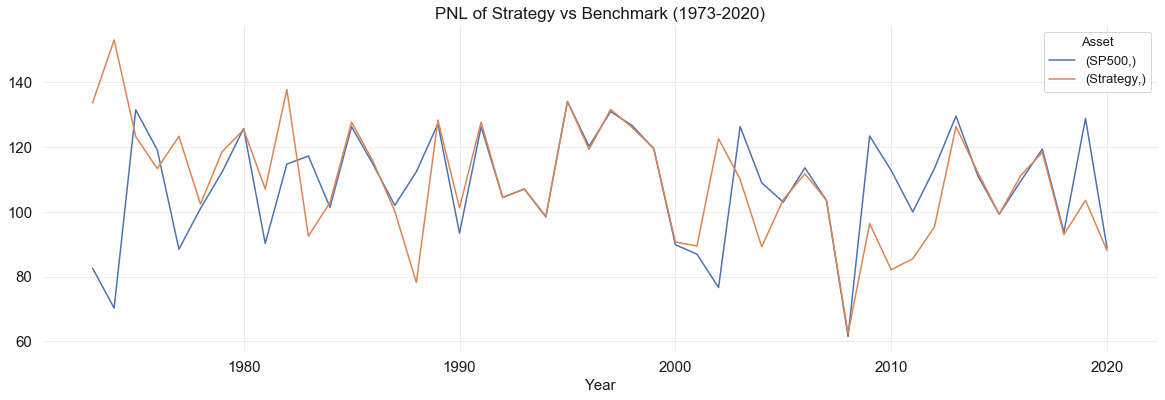

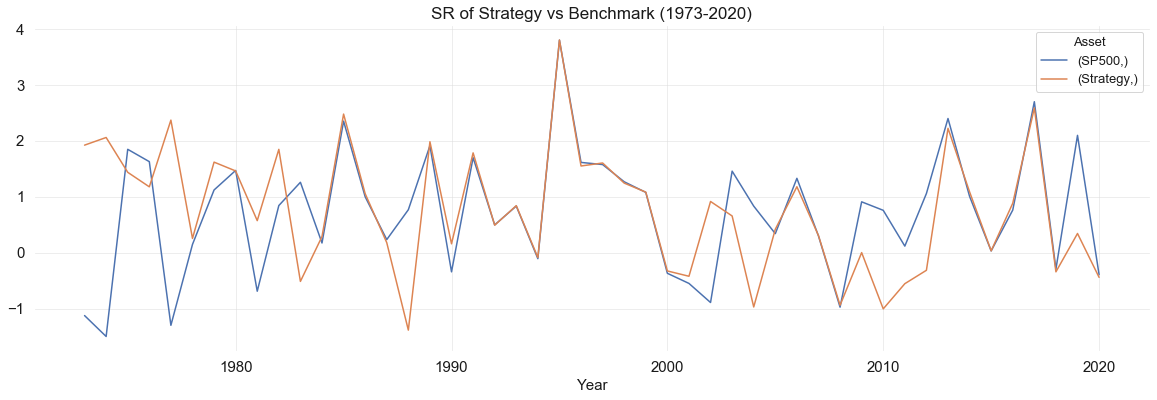

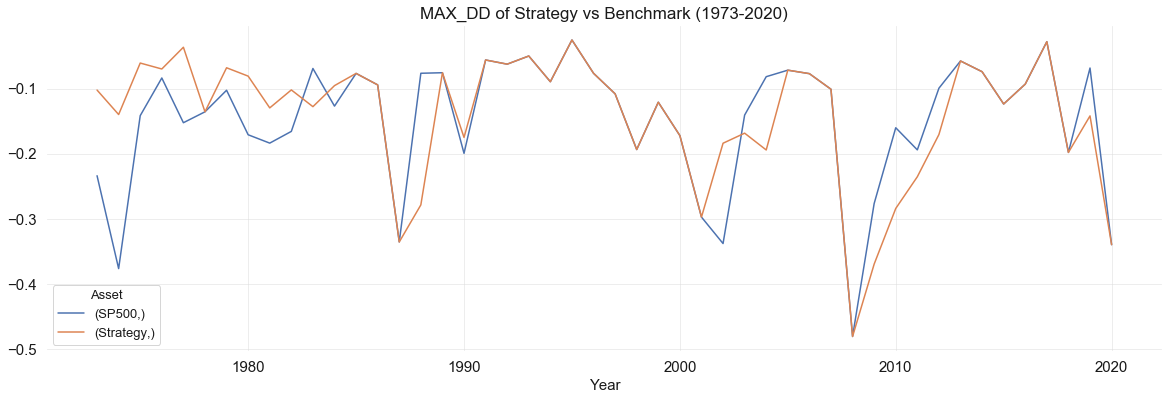

In [18]:
metrics_df.xs('PNL', axis=1, level=1)
metrics_df.xs('PNL', axis=1, level=1).T.plot(title="PNL of Strategy vs Benchmark (1973-2020)")
metrics_df.xs('SR', axis=1, level=1).T.plot(title="SR of Strategy vs Benchmark (1973-2020)")
metrics_df.xs('MAX_DD', axis=1, level=1).T.plot(title="MAX_DD of Strategy vs Benchmark (1973-2020)")

In [19]:
#metrics_df.xs('Strategy', axis=0).round(3).to_clipboard(sep=',')
#metrics_df.xs('Strategy', axis=0).T.sort_index().round(3).to_clipboard(sep=',')
#metrics_df.swaplevel(axis=1).swapaxes(0,1).sort_index().round(3).to_clipboard(sep=',')

#metrics_df.round(3).to_csv("metrics.csv", sep=';')

In [20]:
#by column: metrics_df.xs('PNL', axis=1, level='Metric')
#metrics_df.xs('PNL', axis=1, level=1) 
#metrics_df.xs('SP500', axis=0) #by index
#metrics_df.loc['SP500', (2013, 'PNL')]
#met = metrics_df.swaplevel(axis=1).swapaxes(0,1).sort_index()
#met

## Analysis of OOS performance

### HTML Reports 

In [21]:
%run Functions.ipynb
html_df = results_df.copy()
html_df.iloc[[0,-1]]

Close  Market_daily_ret  Strat_daily_ret Strat_position Long_only        Costs  Market_cum_ret  Strat_cum_ret
1973-01-02   119.099998          0.008894        -0.000112              1         0  0.000111538      100.889450      99.988846
2020-05-05  2868.439941          0.009041         0.009041              1         1            0     2429.851645    3794.274307

In [22]:
#save_report(html_df['Strat_daily_ret'], benchmark=html_df['Market_daily_ret'])
#qs.reports.full(results_df['Strat_daily_ret'], results_df['Market_daily_ret'])

###  Overall performance (PNL and SR)

In [23]:
print("Overall OOS performace:")
print("\tMarket\tStrategy\nPNL:\t{:.2f}\t{:.2f}\nSR:\t{:.2f}\t{:.2f}".format(results_df.iloc[-1]['Market_cum_ret'], results_df.iloc[-1]['Strat_cum_ret'], 
                                           results_df['Market_daily_ret'].sharpe(), results_df['Strat_daily_ret'].sharpe()))

print("\nAverage OOS performace: (calculated as the mean of PNL and SR of all years)")
print("\tMarket\tStrategy\nPNL:\t{:.2f}\t{:.2f}\nSR:\t{:.2f}\t{:.2f}".format(np.mean(market_pln), np.mean(oos_pln), 
                                           np.mean(market_sr), np.mean(oos_sr)))

Overall OOS performace:
	Market	Strategy
PNL:	2429.85	3794.27
SR:	0.47	0.53

Average OOS performace: (calculated as the mean of PNL and SR of all years)
	Market	Strategy
PNL:	108.33	109.36
SR:	0.72	0.76
